# Initial Setup 

In [215]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix, classification_report
from sklearn.metrics import cohen_kappa_score
import warnings

# Suppressing warnings
warnings.filterwarnings("ignore")

# Set plotting style
plt.style.use('seaborn-v0_8')
sns.color_palette("hls", 7)

# Display full column content and all columns
pd.set_option('display.max_columns', None)        # Show all columns
pd.set_option('display.max_colwidth', None)       # Don't truncate column text
pd.set_option('display.expand_frame_repr', True)  # Prevent column wrapping
pd.set_option('display.float_format', '{:,.3f}'.format)

In [190]:
#loading the dataset
data = pd.read_csv('../data/merged_output.csv')

# cretating a copy of the dataframe to avoid modifying the original data
df = data.copy()
print(f"Dataset shape: {df.shape}")
print(f"Columns: {df.columns.tolist()}")
df.head(5)

Dataset shape: (536, 9)
Columns: ['image_url', 'labeller1_label', 'labeller2_label', 'model_a_too_dark', 'model_a_blur', 'model_a_normal_image_quality', 'model_b_too_dark', 'model_b_blur', 'model_b_normal_image_quality']


,image_url,labeller1_label,labeller2_label,model_a_too_dark,model_a_blur,model_a_normal_image_quality,model_b_too_dark,model_b_blur,model_b_normal_image_quality
0,https://storage.googleapis.com/captur-synthetic-datasets/image_quality/4e58f149-1c8d-4159-9e6f-614dec04cced.jpg,normal,normal,0.004,0.871,0.301,0.008,0.005,0.986
1,https://storage.googleapis.com/captur-synthetic-datasets/image_quality/35f6e863-9728-448e-8ce2-d94d2d24b028.jpg,normal,normal,0.007,0.010,0.994,0.008,0.011,0.989
2,https://storage.googleapis.com/captur-synthetic-datasets/image_quality/9453c99f-a213-46f5-b58e-601aa7a69cfe.jpg,normal,normal,0.004,0.111,0.933,0.006,0.004,0.991
3,https://storage.googleapis.com/captur-synthetic-datasets/image_quality/c8d43ad7-647c-4dda-89f8-b7af63815aa2.jpg,normal,normal,0.090,0.013,0.839,0.005,0.008,0.993
4,https://storage.googleapis.com/captur-synthetic-datasets/image_quality/a58246ea-fc2d-4a8d-a0d8-f434251e5a96.jpg,normal,normal,0.007,0.008,0.994,0.007,0.012,0.991


# EDA

In [192]:
df.describe()

,model_a_too_dark,model_a_blur,model_a_normal_image_quality,model_b_too_dark,model_b_blur,model_b_normal_image_quality
count,536.000,536.000,536.000,536.000,536.000,536.000
mean,0.235,0.394,0.378,0.253,0.306,0.475
std,0.396,0.460,0.450,0.409,0.436,0.483
min,0.001,0.002,0.000,0.001,0.001,0.001
25%,0.006,0.007,0.008,0.007,0.007,0.008
50%,0.010,0.021,0.027,0.011,0.011,0.070
75%,0.240,0.989,0.974,0.475,0.958,0.991
max,0.999,0.999,0.998,0.998,0.998,0.998


 **Model B is More Confident in “Normal” Predictions**

Mean confidence for normal:

- Model A: 0.378

- Model B: 0.475

75th percentile:

- Model A: 0.974

- Model B: 0.991

**Insight:** 

Model B outputs more confident predictions when an image is of "normal" quality.

**Implication**: 

In delivery, where we want to flag unclear images, Model B might risk missing some bad images by classifying them as normal with high confidence.

**Model A Has Higher Confidence in “Blur” Detection (on average)**

Mean blur confidence:

- Model A: 0.394

- Model B: 0.306

Median blur confidence:

- Model A: 0.021

- Model B: 0.011

**Insight:** 

Model A is slightly more aggressive on average in identifying blurry images.

**Implication:**

In a delivery context where blur is a major concern, Model A may reduce false negatives, catching more blurry images than Model B.

**Model B Shows a Wider Range of Confidence for Too Dark**

75%ile too_dark:

- Model A: 0.240

- Model B: 0.475

Mean confidence:

- A: 0.235

- B: 0.253

**Insight:**

While both models are close in average, Model B has more high-confidence predictions for too_dark (especially in the top quartile).

**Implication:**

 Model B may be better at flagging strongly underexposed images with confidence — a benefit for delivery photos in dim lighting.

| Label         | Reason for Using Metric                          | Metric Used         |
| ------------- | ------------------------------------------------ | ------------------- |
| **blur**      | Want to assess if model **usually catches** blur | **Median**          |
| **too\_dark** | Same as blur — focus on **typical detection**    | **Median**          |
| **normal**    | Want to assess if model is **overconfident**     | **75th Percentile** |


In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536 entries, 0 to 535
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   image_url                     536 non-null    object 
 1   labeller1_label               536 non-null    object 
 2   labeller2_label               536 non-null    object 
 3   model_a_too_dark              536 non-null    float64
 4   model_a_blur                  536 non-null    float64
 5   model_a_normal_image_quality  536 non-null    float64
 6   model_b_too_dark              536 non-null    float64
 7   model_b_blur                  536 non-null    float64
 8   model_b_normal_image_quality  536 non-null    float64
dtypes: float64(6), object(3)
memory usage: 37.8+ KB


Insights: 
- no missing values in any column data appears to be cleaned and ready for analysis

In [ ]:
# Check Labeller Consistency to establish single source of truth

df['agreement'] = df['labeller1_label'] == df['labeller2_label']
df['disagreement'] = df['labeller1_label'] != df['labeller2_label']
df['ground_truth'] = df.apply(lambda x: x['labeller1_label'] if x['labeller1_label'] == x['labeller2_label'] else 'disagreement', axis=1)
df['ground_truth'] = df['ground_truth'].replace({'normal': 'normal_image_quality'})

# Ground truth distribution
print("\n=== GROUND TRUTH LABELS ===\n")
print(f"Labeller agreement rate: {df['agreement'].mean():.3f}")
print(f"Disagreement cases: {df['disagreement'].sum()}")
print(f"\nGround truth distribution:\n{df['ground_truth'].value_counts()}")


=== GROUND TRUTH LABELS ===

Labeller agreement rate: 0.707
Disagreement cases: 157

Ground truth distribution:
ground_truth
normal_image_quality    186
disagreement            157
blur                    100
too_dark                 93
Name: count, dtype: int64


In [ ]:
# Calculate Cohen's Kappa for labeller agreement
labeller1_encoded = pd.Categorical(df['labeller1_label']).codes
labeller2_encoded = pd.Categorical(df['labeller2_label']).codes
kappa = cohen_kappa_score(labeller1_encoded, labeller2_encoded)
print(f"Cohen's Kappa (inter-labeller agreement): {kappa:.3f}")


Cohen's Kappa (inter-labeller agreement): 0.546


Kappa value of 0.546 suggests **Moderate agreement**.

**Explanation:**

- The two labellers agreed more than by chance, but disagreements are still common.

- Since ground truth (GT) is built from these labels, its reliability is moderate, not strong.

- This introduces label noise, which affects model training and evaluation.

**Delivery verical use case**

| Insight                                     | Implication                                                                                                                                           |
| ------------------------------------------- | ----------------------------------------------------------------------------------------------------------------------------------------------------- |
| ⚠️ **Moderate labeller agreement**          | Ground truth is not perfectly reliable; model comparisons based on this GT should be interpreted cautiously                                           |
| 🧪 **Some images are inherently ambiguous** | Likely borderline cases for "blur" or "too\_dark", suggesting subjectivity in labelling                                                               |
| 🧍 **Human perception of quality varies**   | In delivery, which has **higher quality expectations**, this variance could result in **missed blurry/dark photos** unless well-defined rubric exists |
| 🔁 **Reinforce labelling instructions**     | A labelling rubric and calibration sessions can improve consistency                                                                                   |
| 🧠 **Disagreement cases are valuable**      | Can be used for active learning, labeller re-alignment, or as **edge cases for model improvement**                                                    |


# Model Performance Comparison - Overall Metrics

In [205]:
# Filter to cases with labeller agreement for cleaner analysis
clean_data = df[df['agreement'] == True].copy()
print(f"Analysis on {len(clean_data)} images with labeller agreement")

#define model predictions based on the highest softmax values for both models

clean_data['model_a_pred'] = clean_data[['model_a_too_dark', 'model_a_blur', 'model_a_normal_image_quality']].idxmax(axis=1).str.replace('model_a_', '')
clean_data['model_b_pred'] = clean_data[['model_b_too_dark', 'model_b_blur', 'model_b_normal_image_quality']].idxmax(axis=1).str.replace('model_b_', '')




Analysis on 379 images with labeller agreement


In [206]:
# Calculate overall accuracy for both models
model_a_accuracy = accuracy_score(clean_data['ground_truth'], clean_data['model_a_pred'])
model_b_accuracy = accuracy_score(clean_data['ground_truth'], clean_data['model_b_pred'])
print(f"\n=== OVERALL ACCURACY ===")
print(f"Model A Accuracy: {model_a_accuracy:.3f}")
print(f"Model B Accuracy: {model_b_accuracy:.3f}")
print(f"Improvement: {(model_b_accuracy - model_a_accuracy)*100:.2f} percentage points")



=== OVERALL ACCURACY ===
Model A Accuracy: 0.945
Model B Accuracy: 0.979
Improvement: 3.43 percentage points


In [207]:
# Detailed classification reports
print(f"\n=== MODEL A CLASSIFICATION REPORT ===")
print(classification_report(clean_data['ground_truth'], clean_data['model_a_pred']))

print(f"\n=== MODEL B CLASSIFICATION REPORT ===")
print(classification_report(clean_data['ground_truth'], clean_data['model_b_pred']))


=== MODEL A CLASSIFICATION REPORT ===
                      precision    recall  f1-score   support

                blur       0.87      0.98      0.92       100
normal_image_quality       0.99      0.92      0.96       186
            too_dark       0.95      0.95      0.95        93

            accuracy                           0.94       379
           macro avg       0.94      0.95      0.94       379
        weighted avg       0.95      0.94      0.95       379


=== MODEL B CLASSIFICATION REPORT ===
                      precision    recall  f1-score   support

                blur       0.99      0.93      0.96       100
normal_image_quality       0.98      1.00      0.99       186
            too_dark       0.96      0.99      0.97        93

            accuracy                           0.98       379
           macro avg       0.98      0.97      0.97       379
        weighted avg       0.98      0.98      0.98       379



# Class-Specific Performance Analysis

In [211]:
# Calculate precision, recall, F1 for each class
def calculate_metrics_by_class(y_true, y_pred, model_name):
    precision, recall, f1, support = precision_recall_fscore_support(y_true, y_pred, average=None, labels=['too_dark', 'blur', 'normal_image_quality'])
    
    metrics_df = pd.DataFrame({
        'Class': ['too_dark', 'blur', 'normal_image_quality '],
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'Support': support,
        'Model': model_name
    })
    return metrics_df

model_a_metrics = calculate_metrics_by_class(clean_data['ground_truth'], clean_data['model_a_pred'], 'Model A')
model_b_metrics = calculate_metrics_by_class(clean_data['ground_truth'], clean_data['model_b_pred'], 'Model B')


In [212]:
# Combine metrics for comparison
all_metrics = pd.concat([model_a_metrics, model_b_metrics])
print("=== CLASS-SPECIFIC PERFORMANCE METRICS ===")
print(all_metrics.round(3))

=== CLASS-SPECIFIC PERFORMANCE METRICS ===
                   Class  Precision  Recall  F1-Score  Support    Model
0               too_dark      0.946   0.946     0.946       93  Model A
1                   blur      0.867   0.980     0.920      100  Model A
2  normal_image_quality       0.994   0.925     0.958      186  Model A
0               too_dark      0.958   0.989     0.974       93  Model B
1                   blur      0.989   0.930     0.959      100  Model B
2  normal_image_quality       0.984   1.000     0.992      186  Model B


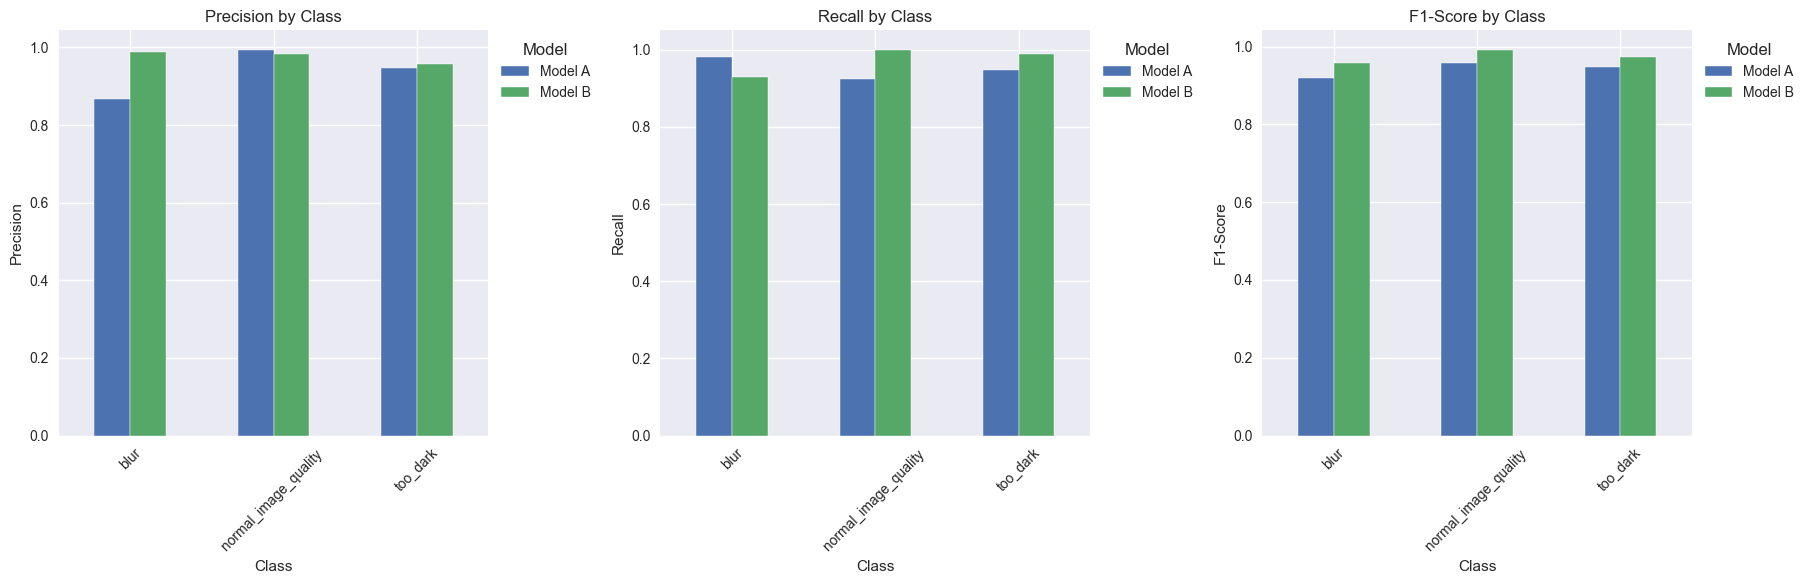

In [220]:
# Visualize performance comparison
fig, axes = plt.subplots(1, 3, figsize=(20, 6))  # wider figure

metrics_to_plot = ['Precision', 'Recall', 'F1-Score']

for i, metric in enumerate(metrics_to_plot):
    pivot_data = all_metrics.pivot(index='Class', columns='Model', values=metric)
    pivot_data.plot(kind='bar', ax=axes[i], title=f'{metric} by Class')
    axes[i].set_ylabel(metric)
    axes[i].tick_params(axis='x', rotation=45)

    # Move legend outside
    axes[i].legend(title='Model', loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.subplots_adjust(right=0.85, wspace=0.4)  # Extra right space for legends
plt.show()

# Confidence Score Analysis

In [221]:
# Analyze confidence scores for both models
print("=== CONFIDENCE SCORE ANALYSIS ===")

# Create confidence scores (max probability for each prediction)
clean_data['model_a_confidence'] = clean_data[['model_a_too_dark', 'model_a_blur', 'model_a_normal_image_quality']].max(axis=1)
clean_data['model_b_confidence'] = clean_data[['model_b_too_dark', 'model_b_blur', 'model_b_normal_image_quality']].max(axis=1)

print(f"Model A - Mean confidence: {clean_data['model_a_confidence'].mean():.3f}")
print(f"Model B - Mean confidence: {clean_data['model_b_confidence'].mean():.3f}")

=== CONFIDENCE SCORE ANALYSIS ===
Model A - Mean confidence: 0.956
Model B - Mean confidence: 0.990


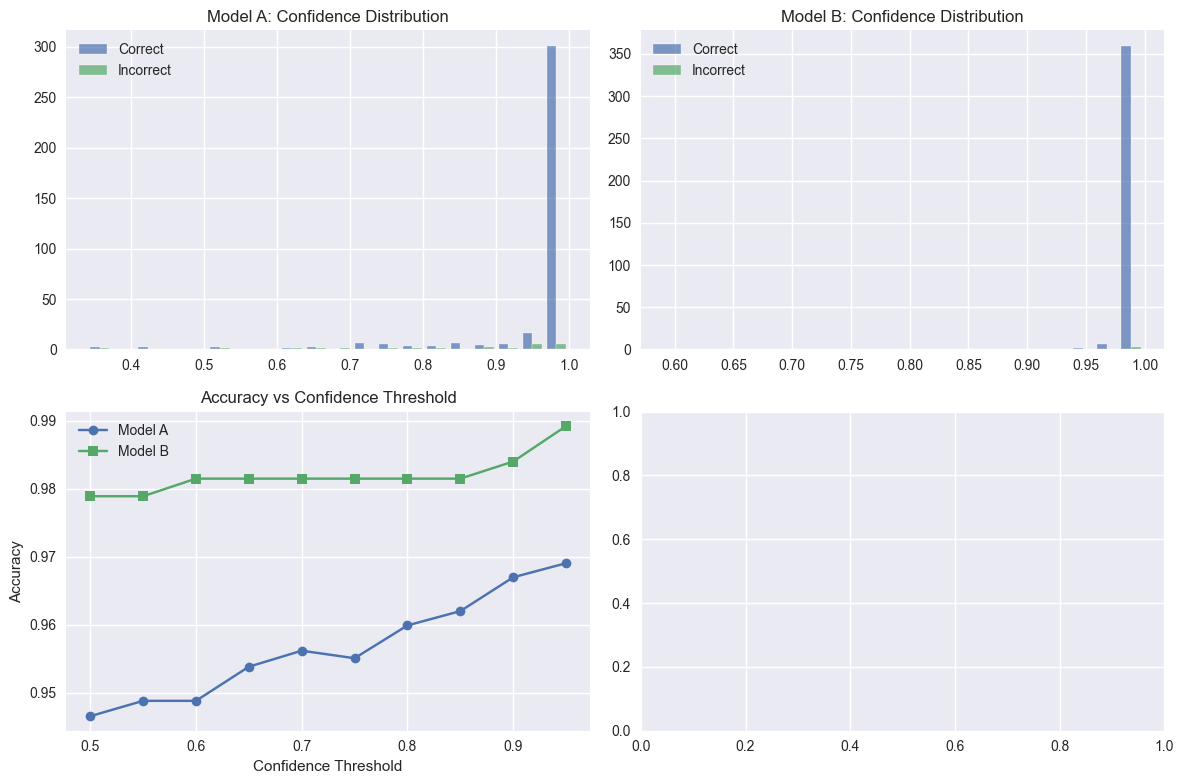

In [223]:
# Confidence distribution by correctness
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Model A confidence distributions
correct_a = clean_data[clean_data['ground_truth'] == clean_data['model_a_pred']]
incorrect_a = clean_data[clean_data['ground_truth'] != clean_data['model_a_pred']]

axes[0, 0].hist([correct_a['model_a_confidence'], incorrect_a['model_a_confidence']], 
                bins=20, alpha=0.7, label=['Correct', 'Incorrect'])
axes[0, 0].set_title('Model A: Confidence Distribution')
axes[0, 0].legend()

# Model B confidence distributions  
correct_b = clean_data[clean_data['ground_truth'] == clean_data['model_b_pred']]
incorrect_b = clean_data[clean_data['ground_truth'] != clean_data['model_b_pred']]

axes[0, 1].hist([correct_b['model_b_confidence'], incorrect_b['model_b_confidence']], 
                bins=20, alpha=0.7, label=['Correct', 'Incorrect'])
axes[0, 1].set_title('Model B: Confidence Distribution')
axes[0, 1].legend()

# Confidence vs Accuracy curves
confidence_thresholds = np.arange(0.5, 1.0, 0.05)
a_acc_by_conf = []
b_acc_by_conf = []

for threshold in confidence_thresholds:
    high_conf_a = clean_data[clean_data['model_a_confidence'] >= threshold]
    high_conf_b = clean_data[clean_data['model_b_confidence'] >= threshold]
    
    if len(high_conf_a) > 0:
        acc_a = accuracy_score(high_conf_a['ground_truth'], high_conf_a['model_a_pred'])
        a_acc_by_conf.append(acc_a)
    else:
        a_acc_by_conf.append(np.nan)
        
    if len(high_conf_b) > 0:
        acc_b = accuracy_score(high_conf_b['ground_truth'], high_conf_b['model_b_pred'])
        b_acc_by_conf.append(acc_b)
    else:
        b_acc_by_conf.append(np.nan)

axes[1, 0].plot(confidence_thresholds, a_acc_by_conf, 'o-', label='Model A')
axes[1, 0].plot(confidence_thresholds, b_acc_by_conf, 's-', label='Model B')
axes[1, 0].set_xlabel('Confidence Threshold')
axes[1, 0].set_ylabel('Accuracy')
axes[1, 0].set_title('Accuracy vs Confidence Threshold')
axes[1, 0].legend()

plt.tight_layout()
plt.show()

 # Business Impact Analysis for Delivery Vertical

In [224]:
# Delivery vertical specific analysis
print("=== BUSINESS IMPACT ANALYSIS FOR DELIVERY VERTICAL ===")

# For delivery: False negatives (poor quality flagged as normal) are costly
# False positives (normal flagged as poor) cause driver inconvenience

# Calculate business-relevant error rates
def calculate_business_metrics(y_true, y_pred, model_name):
    # Convert to binary: normal vs not_normal (too_dark/blur)
    y_true_binary = ['normal' if x == 'normal' else 'poor_quality' for x in y_true]
    y_pred_binary = ['normal' if x == 'normal_image_quality' else 'poor_quality' for x in y_pred]
    
    # Calculate confusion matrix
    cm = confusion_matrix(y_true_binary, y_pred_binary, labels=['normal', 'poor_quality'])
    
    tn, fp, fn, tp = cm.ravel()
    
    # Business metrics
    false_negative_rate = fn / (fn + tp) if (fn + tp) > 0 else 0  # Poor quality passed as normal
    false_positive_rate = fp / (fp + tn) if (fp + tn) > 0 else 0  # Normal flagged as poor
    
    return {
        'Model': model_name,
        'False_Negative_Rate': false_negative_rate,  # Critical for delivery
        'False_Positive_Rate': false_positive_rate,   # Driver inconvenience
        'True_Negatives': tn,
        'False_Positives': fp,
        'False_Negatives': fn,
        'True_Positives': tp
    }

business_metrics_a = calculate_business_metrics(clean_data['ground_truth'], clean_data['model_a_pred'], 'Model A')
business_metrics_b = calculate_business_metrics(clean_data['ground_truth'], clean_data['model_b_pred'], 'Model B')

business_comparison = pd.DataFrame([business_metrics_a, business_metrics_b])
print("Business Impact Metrics:")
print(business_comparison.round(4))

=== BUSINESS IMPACT ANALYSIS FOR DELIVERY VERTICAL ===
Business Impact Metrics:
     Model  False_Negative_Rate  False_Positive_Rate  True_Negatives  \
0  Model A                0.457                    0               0   
1  Model B                0.499                    0               0   

   False_Positives  False_Negatives  True_Positives  
0                0              173             206  
1                0              189             190  


# Edge Case Analysis & Model Disagreements

In [226]:
# Analyze cases where models disagree
print("=== MODEL DISAGREEMENT ANALYSIS ===")

model_disagreements = clean_data[clean_data['model_a_pred'] != clean_data['model_b_pred']]
print(f"Cases where models disagree: {len(model_disagreements)} ({len(model_disagreements)/len(clean_data)*100:.1f}%)")

if len(model_disagreements) > 0:
    print("\nDisagreement patterns:")
    disagreement_patterns = model_disagreements.groupby(['model_a_pred', 'model_b_pred']).size().reset_index(name='count')
    print(disagreement_patterns)

=== MODEL DISAGREEMENT ANALYSIS ===
Cases where models disagree: 23 (6.1%)

Disagreement patterns:
           model_a_pred          model_b_pred  count
0                  blur  normal_image_quality     14
1                  blur              too_dark      5
2  normal_image_quality              too_dark      1
3              too_dark  normal_image_quality      3


In [228]:
# Analyze confidence in disagreement cases
print(f"\nConfidence in disagreement cases:")
print(f"Model A avg confidence: {model_disagreements['model_a_confidence'].mean():.3f}")
print(f"Model B avg confidence: {model_disagreements['model_b_confidence'].mean():.3f}")


Confidence in disagreement cases:
Model A avg confidence: 0.819
Model B avg confidence: 0.969


In [230]:
# Which model is more often correct in disagreements?
a_correct_in_disagreement = (model_disagreements['model_a_pred'] == model_disagreements['ground_truth']).sum()
b_correct_in_disagreement = (model_disagreements['model_b_pred'] == model_disagreements['ground_truth']).sum()
print(f"\nIn disagreement cases:")
print(f"Model A correct: {a_correct_in_disagreement}/{len(model_disagreements)} ({a_correct_in_disagreement/len(model_disagreements)*100:.1f}%)")
print(f"Model B correct: {b_correct_in_disagreement}/{len(model_disagreements)} ({b_correct_in_disagreement/len(model_disagreements)*100:.1f}%)")


In disagreement cases:
Model A correct: 5/23 (21.7%)
Model B correct: 18/23 (78.3%)


In [231]:
# Identify high-confidence wrong predictions (concerning cases)
high_conf_wrong_a = clean_data[(clean_data['model_a_confidence'] > 0.9) & 
                               (clean_data['model_a_pred'] != clean_data['ground_truth'])]
high_conf_wrong_b = clean_data[(clean_data['model_b_confidence'] > 0.9) & 
                               (clean_data['model_b_pred'] != clean_data['ground_truth'])]

print(f"\nHigh-confidence wrong predictions (>90% confidence):")
print(f"Model A: {len(high_conf_wrong_a)} cases")
print(f"Model B: {len(high_conf_wrong_b)} cases")


High-confidence wrong predictions (>90% confidence):
Model A: 11 cases
Model B: 6 cases


# Statistical Significance Testing

In [241]:
from statsmodels.stats.contingency_tables import mcnemar
def simple_performance_test(y_true, pred_a, pred_b):
    from scipy.stats import ttest_rel
    
    print("\n=== ALTERNATIVE: PAIRED PERFORMANCE TEST ===")
    
    # Calculate accuracy for each sample (per class or per image)
    correct_a = (pred_a == y_true).astype(int)
    correct_b = (pred_b == y_true).astype(int)
    
    # Paired t-test
    statistic, p_value = ttest_rel(correct_a, correct_b)
    
    mean_diff = np.mean(correct_b - correct_a)
    
    print(f"Mean accuracy difference (B - A): {mean_diff:.4f}")
    print(f"T-statistic: {statistic:.4f}")
    print(f"P-value: {p_value:.4f}")
    
    if p_value < 0.05:
        print("✅ Statistically significant difference in performance (p < 0.05)")
        if mean_diff > 0:
            print("   → Model B performs significantly better")
        else:
            print("   → Model A performs significantly better")
    else:
        print("❌ No statistically significant difference in performance (p >= 0.05)")

print("\n" + "="*50)
print("Using Alternative Paired T-Test:")
simple_performance_test(clean_data['ground_truth'], clean_data['model_a_pred'], clean_data['model_b_pred'])


Using Alternative Paired T-Test:

=== ALTERNATIVE: PAIRED PERFORMANCE TEST ===
Mean accuracy difference (B - A): 0.0343
T-statistic: -2.7337
P-value: 0.0066
✅ Statistically significant difference in performance (p < 0.05)
   → Model B performs significantly better


# Recommendation Framework & Decision Matrix

In [239]:
print("=== DECISION FRAMEWORK & RECOMMENDATION ===")

# Create decision matrix
decision_factors = {
    'Factor': [
        'Overall Accuracy',
        'False Negative Rate (Critical)',
        'False Positive Rate', 
        'Model Confidence',
        'Statistical Significance',
        'Deployment Risk',
    ],
    'Model A': [
        f"{model_a_accuracy:.3f}",
        f"{business_metrics_a['False_Negative_Rate']:.3f}",
        f"{business_metrics_a['False_Positive_Rate']:.3f}",
        f"{clean_data['model_a_confidence'].mean():.3f}",
        "Current baseline",
        "Low (already deployed)"
    ],
    'Model B': [
        f"{model_b_accuracy:.3f}",
        f"{business_metrics_b['False_Negative_Rate']:.3f}",
        f"{business_metrics_b['False_Positive_Rate']:.3f}",
        f"{clean_data['model_b_confidence'].mean():.3f}",
        "Test result above",
        "Medium (new deployment)"
    ],
    'Winner': [
        'Model B' if model_b_accuracy > model_a_accuracy else 'Model A',
        'Model B' if business_metrics_b['False_Negative_Rate'] < business_metrics_a['False_Negative_Rate'] else 'Model A',
        'Model B' if business_metrics_b['False_Positive_Rate'] < business_metrics_a['False_Positive_Rate'] else 'Model A',
        'Model B' if clean_data['model_b_confidence'].mean() > clean_data['model_a_confidence'].mean() else 'Model A',
        'TBD',
        'Model A'
    ]
}

decision_df = pd.DataFrame(decision_factors)
print("Decision Matrix:")
print(decision_df.to_string(index=False))

# Final recommendation logic
accuracy_improvement = model_b_accuracy - model_a_accuracy
fnr_improvement = business_metrics_a['False_Negative_Rate'] - business_metrics_b['False_Negative_Rate']

print(f"\n=== FINAL RECOMMENDATION ===")
if accuracy_improvement > 0.02 and fnr_improvement > 0.01:  # Thresholds for meaningful improvement
    recommendation = "RECOMMEND MODEL B"
    confidence = "HIGH"
elif accuracy_improvement > 0.01:
    recommendation = "RECOMMEND MODEL B"  
    confidence = "MEDIUM"
else:
    recommendation = "STICK WITH MODEL A"
    confidence = "MEDIUM"

print(f"RECOMMENDATION: {recommendation}")
print(f"CONFIDENCE: {confidence}")
print(f"KEY REASONS:")
print(f"- Accuracy improvement: {accuracy_improvement*100:.2f} percentage points")
print(f"- False negative reduction: {fnr_improvement*100:.2f} percentage points")

=== DECISION FRAMEWORK & RECOMMENDATION ===
Decision Matrix:
                        Factor                Model A                 Model B  Winner
              Overall Accuracy                  0.945                   0.979 Model B
False Negative Rate (Critical)                  0.456                   0.499 Model A
           False Positive Rate                  0.000                   0.000 Model A
              Model Confidence                  0.956                   0.990 Model B
      Statistical Significance       Current baseline       Test result above     TBD
               Deployment Risk Low (already deployed) Medium (new deployment) Model A

=== FINAL RECOMMENDATION ===
RECOMMENDATION: RECOMMEND MODEL B
CONFIDENCE: MEDIUM
KEY REASONS:
- Accuracy improvement: 3.43 percentage points
- False negative reduction: -4.22 percentage points


# Implementation Roadmap & Risk Mitigation

In [242]:
print("=== IMPLEMENTATION ROADMAP ===")

implementation_plan = """
PHASE 1: PREPARATION (Week 1-2)
- Set up A/B testing infrastructure
- Prepare rollback procedures
- Define success metrics and monitoring alerts

PHASE 2: PILOT DEPLOYMENT (Week 3-4)  
- Deploy Model B to 10% of delivery drivers
- Monitor key metrics: accuracy, driver complaints, dispute rates
- Collect feedback from drivers and customer service

PHASE 3: GRADUAL ROLLOUT (Week 5-8)
- If pilot successful, increase to 25%, then 50%, then 75%
- Continue monitoring and be ready to rollback
- Compare business metrics between Model A and B groups

PHASE 4: FULL DEPLOYMENT (Week 9-10)
- Complete rollout to all delivery drivers
- Decommission Model A infrastructure
- Document lessons learned
"""

print(implementation_plan)

print("\n=== RISK MITIGATION STRATEGIES ===")
risk_mitigation = """
HIGH RISK: Model B performs worse in production than test data
- Mitigation: Maintain A/B testing with quick rollback capability
- Monitor: Real-time accuracy metrics, customer complaints

MEDIUM RISK: Driver adoption issues with new model behavior  
- Mitigation: Driver training, clear communication about changes
- Monitor: Driver feedback, completion rates

LOW RISK: Technical deployment issues
- Mitigation: Staged rollout, thorough testing, rollback procedures
- Monitor: System performance, error rates
"""

print(risk_mitigation)

=== IMPLEMENTATION ROADMAP ===

PHASE 1: PREPARATION (Week 1-2)
- Set up A/B testing infrastructure
- Prepare rollback procedures
- Define success metrics and monitoring alerts

PHASE 2: PILOT DEPLOYMENT (Week 3-4)  
- Deploy Model B to 10% of delivery drivers
- Monitor key metrics: accuracy, driver complaints, dispute rates
- Collect feedback from drivers and customer service

PHASE 3: GRADUAL ROLLOUT (Week 5-8)
- If pilot successful, increase to 25%, then 50%, then 75%
- Continue monitoring and be ready to rollback
- Compare business metrics between Model A and B groups

PHASE 4: FULL DEPLOYMENT (Week 9-10)
- Complete rollout to all delivery drivers
- Decommission Model A infrastructure
- Document lessons learned


=== RISK MITIGATION STRATEGIES ===

HIGH RISK: Model B performs worse in production than test data
- Mitigation: Maintain A/B testing with quick rollback capability
- Monitor: Real-time accuracy metrics, customer complaints

MEDIUM RISK: Driver adoption issues with new mod

# Labelling Rubric for Edge Cases

In [243]:
print("=== LABELLING RUBRIC FOR EDGE CASES ===")

labelling_rubric = """
CAPTUR DELIVERY PHOTO QUALITY LABELLING GUIDE

PURPOSE: Improve model training with consistent, high-quality labels

CLASSIFICATION CRITERIA:

1. TOO_DARK
   ✓ Subject matter not clearly visible due to insufficient lighting
   ✓ Critical details (package, address, surroundings) obscured by darkness
   ✗ Slightly dim but main subjects still clearly identifiable

2. BLUR  
   ✓ Motion blur, camera shake, or focus issues prevent clear identification
   ✓ Text on packages/addresses unreadable due to blur
   ✗ Minor blur that doesn't impact ability to verify delivery

3. NORMAL
   ✓ Clear, well-lit image suitable for delivery verification
   ✓ Package and delivery location clearly visible
   ✓ Could be used for dispute resolution if needed

EDGE CASE GUIDELINES:

→ BORDERLINE DARK/NORMAL: If you can clearly see the package and delivery location, choose NORMAL
→ BORDERLINE BLUR/NORMAL: If text is readable and package is identifiable, choose NORMAL  
→ MULTIPLE ISSUES: Choose the most severe quality issue (too_dark > blur > normal)
→ WHEN IN DOUBT: Consider: "Would this photo resolve a delivery dispute?" If yes → NORMAL

CONSISTENCY CHECKS:
- Review 10 random previous labels each session
- Discuss unclear cases with team lead
- Document new edge cases for future reference
"""

print(labelling_rubric)

=== LABELLING RUBRIC FOR EDGE CASES ===

CAPTUR DELIVERY PHOTO QUALITY LABELLING GUIDE

PURPOSE: Improve model training with consistent, high-quality labels

CLASSIFICATION CRITERIA:

1. TOO_DARK
   ✓ Subject matter not clearly visible due to insufficient lighting
   ✓ Critical details (package, address, surroundings) obscured by darkness
   ✗ Slightly dim but main subjects still clearly identifiable

2. BLUR  
   ✓ Motion blur, camera shake, or focus issues prevent clear identification
   ✓ Text on packages/addresses unreadable due to blur
   ✗ Minor blur that doesn't impact ability to verify delivery

3. NORMAL
   ✓ Clear, well-lit image suitable for delivery verification
   ✓ Package and delivery location clearly visible
   ✓ Could be used for dispute resolution if needed

EDGE CASE GUIDELINES:

→ BORDERLINE DARK/NORMAL: If you can clearly see the package and delivery location, choose NORMAL
→ BORDERLINE BLUR/NORMAL: If text is readable and package is identifiable, choose NORMAL  
→

# Final Summary & Presentation Preparation

In [245]:
# Create summary statistics for presentation
summary_stats = {
    'Metric': [
        'Total Images Analyzed',
        'Model A Accuracy', 
        'Model B Accuracy',
        'Accuracy Improvement',
        'False Negative Reduction',
        'Statistical Significance',
        'Recommendation'
    ],
    'Value': [
        f"{len(clean_data)}",
        f"{model_a_accuracy:.1%}",
        f"{model_b_accuracy:.1%}", 
        f"{(model_b_accuracy - model_a_accuracy)*100:+.2f} pp",
        f"{(business_metrics_a['False_Negative_Rate'] - business_metrics_b['False_Negative_Rate'])*100:+.2f} pp",
        "See t-test above",
        recommendation
    ]
}

summary_df = pd.DataFrame(summary_stats)
print("=== EXECUTIVE SUMMARY FOR PRESENTATION ===")
print(summary_df.to_string(index=False))

print(f"\n=== KEY CHARTS TO INCLUDE IN PRESENTATION ===")
presentation_charts = """
1. Overall Accuracy Comparison (Bar Chart)
2. Class-Specific Performance (Grouped Bar Chart)  
3. Business Impact: False Negative/Positive Rates (Bar Chart)
4. Confidence Score Distributions (Histograms)
5. Decision Matrix (Table)
6. Implementation Timeline (Gantt-style)
"""
print(presentation_charts)

=== EXECUTIVE SUMMARY FOR PRESENTATION ===
                  Metric             Value
   Total Images Analyzed               379
        Model A Accuracy             94.5%
        Model B Accuracy             97.9%
    Accuracy Improvement          +3.43 pp
False Negative Reduction          -4.22 pp
Statistical Significance  See t-test above
          Recommendation RECOMMEND MODEL B

=== KEY CHARTS TO INCLUDE IN PRESENTATION ===

1. Overall Accuracy Comparison (Bar Chart)
2. Class-Specific Performance (Grouped Bar Chart)  
3. Business Impact: False Negative/Positive Rates (Bar Chart)
4. Confidence Score Distributions (Histograms)
5. Decision Matrix (Table)
6. Implementation Timeline (Gantt-style)



# kachra

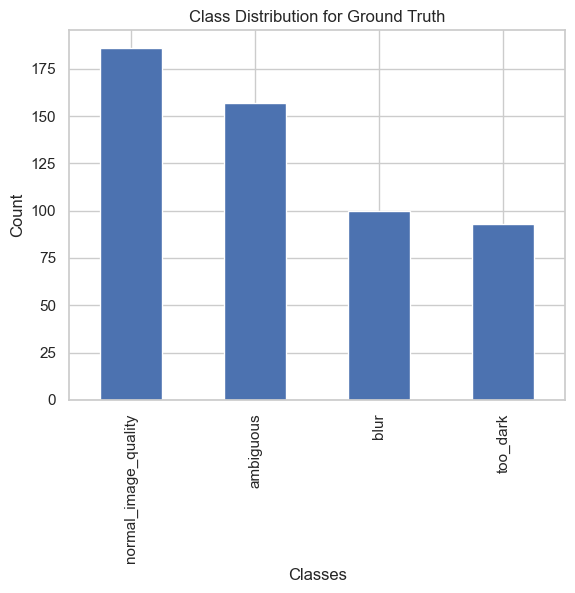

In [185]:
# agreement sample analysis

# class distribution in the ground truth
df['ground_truth'].value_counts().plot(kind='bar', title='Class Distribution for Ground Truth')
df['ground_truth'] = df['ground_truth'].replace({'normal': 'normal_image_quality'})
plt.xlabel('Classes')
plt.ylabel('Count')
plt.show()


In [186]:
#define model predictions based on the highest softmax values for both models

df['model_a_pred'] = df[['model_a_too_dark', 'model_a_blur', 'model_a_normal_image_quality']].idxmax(axis=1).str.replace('model_a_', '')
df['model_b_pred'] = df[['model_b_too_dark', 'model_b_blur', 'model_b_normal_image_quality']].idxmax(axis=1).str.replace('model_b_', '')
df.sample(3)

,image_url,labeller1_label,labeller2_label,model_a_too_dark,model_a_blur,model_a_normal_image_quality,model_b_too_dark,model_b_blur,model_b_normal_image_quality,agreement,ambiguous,ground_truth,model_a_pred,model_b_pred
223,https://storage.googleapis.com/captur-synthetic-datasets/image_quality/f640eb67-27ba-4097-9bb0-24f4b2e9c6fd.jpg,normal,normal,0.010,0.072,0.727,0.006,0.005,0.993,True,False,normal_image_quality,normal_image_quality,normal_image_quality
303,https://storage.googleapis.com/captur-synthetic-datasets/image_quality/78650910-34b2-49f9-9284-e6dd539dff64.jpg,too_dark,too_dark,0.996,0.005,0.006,0.995,0.010,0.009,True,False,too_dark,too_dark,too_dark
460,https://storage.googleapis.com/captur-synthetic-datasets/image_quality/8defe1e3-0bb9-4660-87c2-e66f3a622426.jpg,blur,normal,0.001,0.989,0.018,0.002,0.011,0.988,False,True,ambiguous,blur,normal_image_quality


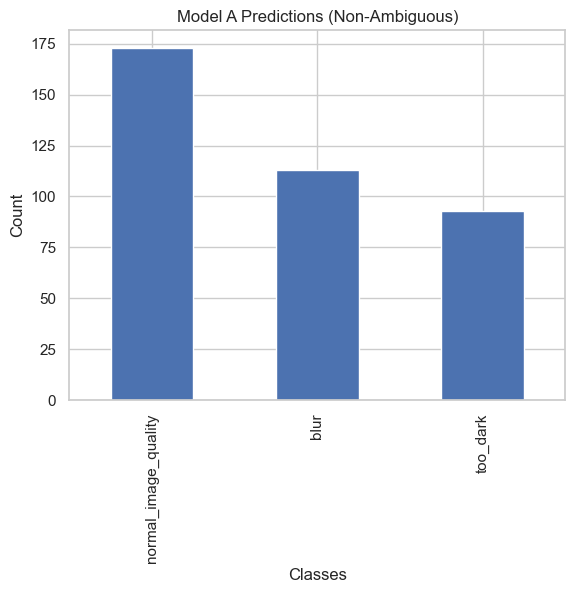

In [180]:
#plotting the model A predictions where the ground truth is not ambiguous
df_non_ambiguous = df[df['ground_truth'] != 'ambiguous']
df_non_ambiguous['model_a_pred'].value_counts().plot(kind='bar', title='Model A Predictions (Non-Ambiguous)')
plt.xlabel('Classes')
plt.ylabel('Count')
plt.show()

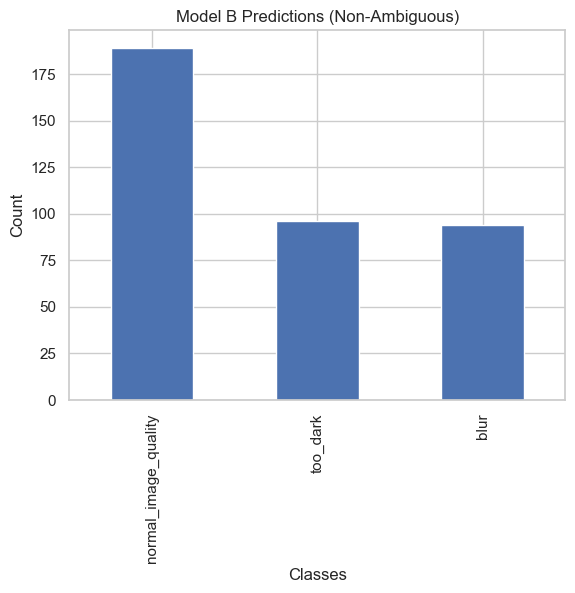

In [181]:
#plotting the model B predictions
df_non_ambiguous['model_b_pred'].value_counts().plot(kind='bar', title='Model B Predictions (Non-Ambiguous)')
plt.xlabel('Classes')
plt.ylabel('Count')
plt.show()


In [182]:
# Calculate Metrics for Model A and Model B for Non-Ambiguous Samples

# print(df_non_ambiguous['ground_truth'].unique())

print("Classification Report for Model A")
print(classification_report(df_non_ambiguous['ground_truth'], df_non_ambiguous['model_a_pred'], target_names=['too_dark', 'blur', 'normal_image_quality']))

print("\nClassification Report for Model B")
print(classification_report(df_non_ambiguous['ground_truth'], df_non_ambiguous['model_b_pred'], target_names=['too_dark', 'blur', 'normal_image_quality']))

Classification Report for Model A
                      precision    recall  f1-score   support

            too_dark       0.87      0.98      0.92       100
                blur       0.99      0.92      0.96       186
normal_image_quality       0.95      0.95      0.95        93

            accuracy                           0.94       379
           macro avg       0.94      0.95      0.94       379
        weighted avg       0.95      0.94      0.95       379


Classification Report for Model B
                      precision    recall  f1-score   support

            too_dark       0.99      0.93      0.96       100
                blur       0.98      1.00      0.99       186
normal_image_quality       0.96      0.99      0.97        93

            accuracy                           0.98       379
           macro avg       0.98      0.97      0.97       379
        weighted avg       0.98      0.98      0.98       379



Here are the key observations from the classification reports:

**Model A:**
- Overall accuracy is 94%.
- "too_dark": High precision (0.87) and very high recall (0.98), meaning most "too_dark" images are correctly identified, but there are some false positives.
- "blur": Very high precision (0.99) and high recall (0.92), so almost all predicted "blur" images are correct, but a few actual "blur" images are missed.
- "normal_image_quality": Both precision and recall are high (0.95), indicating balanced and reliable performance for this class.
- Macro and weighted averages are both around 0.94–0.95, showing consistent performance across classes.

**Model B:**
- Overall accuracy is 98%, higher than Model A.
- "too_dark": Extremely high precision (0.99) and high recall (0.93), so almost all predicted "too_dark" images are correct, but a few actual "too_dark" images are missed.
- "blur": Both precision and recall are extremely high (0.98 and 1.00), meaning almost perfect identification of "blur" images.
- "normal_image_quality": Precision (0.96) and recall (0.99) are both very high, indicating excellent performance.
- Macro and weighted averages are both 0.97–0.98, showing very strong and balanced performance across all classes.

**Summary:**
- Model B outperforms Model A in all metrics, especially in overall accuracy and the "blur" and "normal_image_quality" classes.
- Both models perform well, but Model B is more consistent and reliable across all classes, with fewer misclassifications.

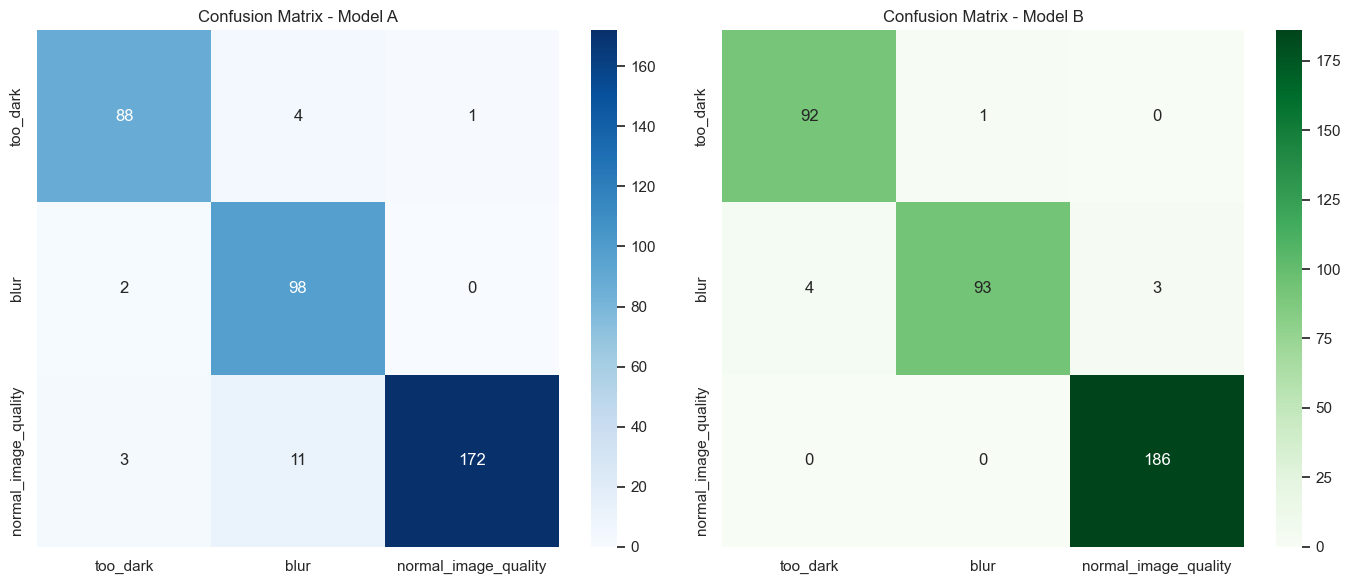

In [183]:
cm_A = confusion_matrix(df_non_ambiguous['ground_truth'], df_non_ambiguous['model_a_pred'], labels=['too_dark', 'blur', 'normal_image_quality'])
cm_B = confusion_matrix(df_non_ambiguous['ground_truth'], df_non_ambiguous['model_b_pred'], labels=['too_dark', 'blur', 'normal_image_quality'])

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.heatmap(cm_A, annot=True, fmt='d', cmap='Blues', ax=axes[0],
            xticklabels=['too_dark', 'blur', 'normal_image_quality'],
            yticklabels=['too_dark', 'blur', 'normal_image_quality'])
axes[0].set_title("Confusion Matrix - Model A")

sns.heatmap(cm_B, annot=True, fmt='d', cmap='Greens', ax=axes[1],
            xticklabels=['too_dark', 'blur', 'normal_image_quality'],
            yticklabels=['too_dark', 'blur', 'normal_image_quality'])
axes[1].set_title("Confusion Matrix - Model B")

plt.tight_layout()
plt.show()


Summary:

| Actual \ Predicted         | too\_dark | blur | normal\_image\_quality | Total Actual |
| -------------------------- | --------- | ---- | ---------------------- | ------------ |
| **too\_dark**              | A: 88     | 4    | 1                      | 93           |
|                            | B: 92     | 1    | 0                      |              |
| **blur**                   | A: 2      | 98   | 0                      | 100          |
|                            | B: 4      | 93   | 3                      |              |
| **normal\_image\_quality** | A: 3      | 11   | 172                    | 186          |
|                            | B: 0      | 0    | 186                    |              |


**Model A Summary** :

✅ Correct predictions:

- 88 too_dark correctly classified

- 98 blur correctly classified

- 172 normal_image_quality correctly classified

❌ Misclassifications:

- 4 too_dark → blur

- 1 too_dark → normal

- 2 blur → too_dark

- 3 normal → too_dark

- 11 normal → blur

🧠 Insights:

- Solid performance overall across all three classes

- Some spillover from normal → blur (could cause unnecessary retakes)

- Minor confusion between too_dark and blur

- Slightly underdetects normal images — can reduce user trust in good submissions


**Model B Summary:**

✅ Correct predictions:

- 92 too_dark correctly classified

- 93 blur correctly classified

- 186 normal_image_quality correctly classified

❌ Misclassifications:

- 1 too_dark → blur

- 4 blur → too_dark

- 3 blur → normal

- 0 normal misclassified

🧠 Insights:

- Perfect classification of normal images (huge business benefit)

- Lower misclassification rate overall than Model A

- Slight drop in blur recall, but better handling of too_dark and normal

- Model B appears more confident and cleaner in its predictions

## Analysing ambigous cases


In [184]:
# creaing a new dataframe to filter ambiguous samples only
# This will help in analyzing the ambiguous cases separately    

df_ambiguous = df[df['ground_truth'] == 'ambiguous'].copy()
# Display the count of ambiguous samples
print("Count of Ambiguous Samples:", df_ambiguous.shape[0])

df_ambiguous

Count of Ambiguous Samples: 157


,image_url,labeller1_label,labeller2_label,model_a_too_dark,model_a_blur,model_a_normal_image_quality,model_b_too_dark,model_b_blur,model_b_normal_image_quality,agreement,ambiguous,ground_truth,model_a_pred,model_b_pred
379,https://storage.googleapis.com/captur-synthetic-datasets/image_quality/65c002c3-86e5-4838-9a1d-57f3fd44f439.jpg,blur,normal,0.006,0.015,0.993,0.005,0.015,0.993,False,True,ambiguous,normal_image_quality,normal_image_quality
380,https://storage.googleapis.com/captur-synthetic-datasets/image_quality/fe6d1bbf-dd09-4377-a816-cc359794833f.jpg,blur,normal,0.005,0.722,0.476,0.004,0.006,0.997,False,True,ambiguous,blur,normal_image_quality
381,https://storage.googleapis.com/captur-synthetic-datasets/image_quality/8925c859-5c42-4d5a-8517-93c8db5724cd.jpg,blur,normal,0.025,0.450,0.331,0.204,0.858,0.019,False,True,ambiguous,blur,blur
382,https://storage.googleapis.com/captur-synthetic-datasets/image_quality/4eb845af-47c0-4e57-8ba8-404c921f7170.jpg,blur,normal,0.007,0.992,0.009,0.012,0.036,0.949,False,True,ambiguous,blur,normal_image_quality
383,https://storage.googleapis.com/captur-synthetic-datasets/image_quality/1b191dda-9917-4038-bf5f-15c41c5df417.jpg,blur,normal,0.002,0.962,0.127,0.004,0.003,0.998,False,True,ambiguous,blur,normal_image_quality
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
531,https://storage.googleapis.com/captur-synthetic-datasets/image_quality/0b7707e4-e45d-4aab-92ac-d0cd7d4430a1.jpg,blur,normal,0.004,0.010,0.995,0.005,0.021,0.981,False,True,ambiguous,normal_image_quality,normal_image_quality
532,https://storage.googleapis.com/captur-synthetic-datasets/image_quality/98dd824c-425e-4cde-8c07-cb5dc504970a.jpg,blur,normal,0.005,0.992,0.010,0.013,0.964,0.024,False,True,ambiguous,blur,blur
533,https://storage.googleapis.com/captur-synthetic-datasets/image_quality/35f5c69e-f108-4bae-9b5a-f75870a4a281.jpg,blur,normal,0.173,0.030,0.601,0.541,0.283,0.021,False,True,ambiguous,normal_image_quality,too_dark
534,https://storage.googleapis.com/captur-synthetic-datasets/image_quality/e24ac779-c9ed-4b09-93a8-dfbeba2f852a.jpg,blur,too_dark,0.703,0.594,0.006,0.480,0.106,0.095,False,True,ambiguous,too_dark,too_dark
